# HSE 2023: Mathematical Methods for Data Analysis

## Homework 5

### Contents

#### PCA, t-SNE – 4 points
* [Task 1](#task1) (1.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (0.5 points)
* [Task 4](#task3) (1 points)
* [Task 5](#task4) (0.5 points)

#### Clustering – 6 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.5 points)
* [Task 7](#task7) (1.5 points)
* [Task 8](#task8) (0.5 point)
* [Task 9](#task8) (1 point)

In [ ]:
!wget https://raw.githubusercontent.com/darkydash/ml_hse/main/hw5/data_Mar_64.txt

--2023-12-09 08:52:03--  https://raw.githubusercontent.com/darkydash/ml_hse/main/hw5/data_Mar_64.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 772930 (755K) [text/plain]
Saving to: ‘data_Mar_64.txt’

data_Mar_64.txt     100%[===================>] 754.81K  --.-KB/s    in 0.06s   

2023-12-09 08:52:03 (12.6 MB/s) - ‘data_Mar_64.txt’ saved [772930/772930]



Load the file `data_Mar_64.txt`.

In [ ]:
import pandas as pd
data = pd.read_csv('data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


This [dataset](https://archive.ics.uci.edu/dataset/241/one+hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK.

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [ ]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [ ]:
import numpy as np

X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (1.5 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics.
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y_name)

In [ ]:
y

array([ 0,  0,  0, ..., 99, 99, 99])

Split your data into **train** and **test** keeping 30% for the test.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Train SVM with linear kernel on your data to predict target. Calculate accuracy, F-score. Also print out confusion matrix



accuracy: 0.00625 | f1: 0.00367032967032967


<Axes: >

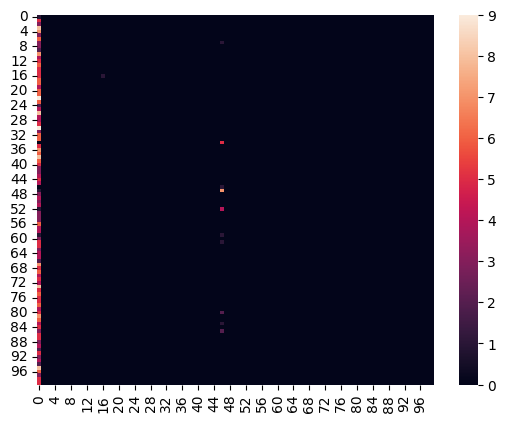

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(f"accuracy: {accuracy_score(y_test, y_pred)} | f1: {f1_score(y_test, y_pred, average='macro')}")
sns.heatmap(confusion_matrix(y_test, y_pred))

Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=1`

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=1)
pca.fit_transform(X)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca

array([[-0.03307489,  0.02892331],
       [-0.02422727,  0.01839179],
       [-0.02629431,  0.03441262],
       ...,
       [-0.06300588, -0.05859334],
       [-0.03770296, -0.05299063],
       [-0.03348526, -0.03997298]])

Select objects that match values from 0 to 15 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<=15]` to the `scatter` method.

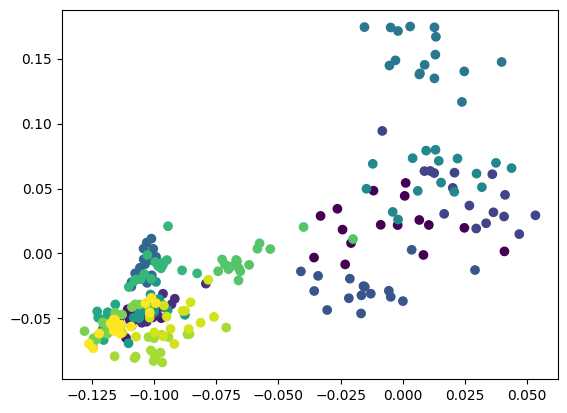

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

X_p = X_pca[y <= 15]
plt.scatter(X_p[:, 0], X_p[:, 1], c=y[y <= 15])

Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

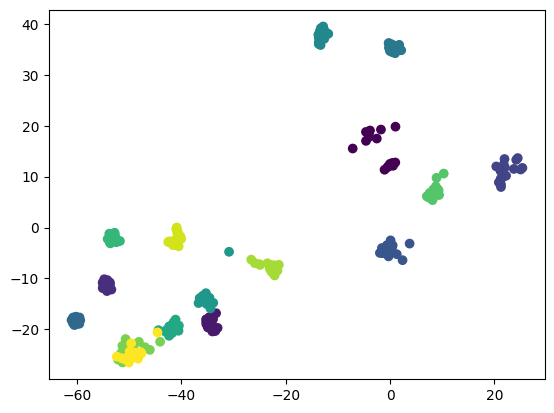

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X)

X_t = X_tsne[y <= 15]
plt.scatter(X_t[:, 0], X_t[:, 1], c=y[y <= 15])

**Task 2. <a id="task2"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the TSNE method. Round the numbers to hundreds.

In [ ]:
## your code here

cords_2_tsne = np.round(X_t[2], 2)
cords_2_tsne

array([ 0.57, 12.13], dtype=float32)

**Task 3. <a id="task3"></a> (0.5 points)** Specify the coordinates of the object with index 2 (`X[2]`) after applying the PCA method. Round the numbers to hundreds.

In [ ]:
## your code here

cords_2_pca = np.round(X_p[2], 2)
cords_2_pca

array([-0.03,  0.03])

**Task 4. <a id="task4"></a> (1 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

> 2




**Task 5. (0.5 points)** Again try to fit your simple classifier, this time using transformed data to two-dimensional space. To do it choose the best feature representation in your opinion from two existing. Did the metrics improve?

accuracy: 0.0020833333333333333 | f1: 7.547169811320754e-05


<Axes: >

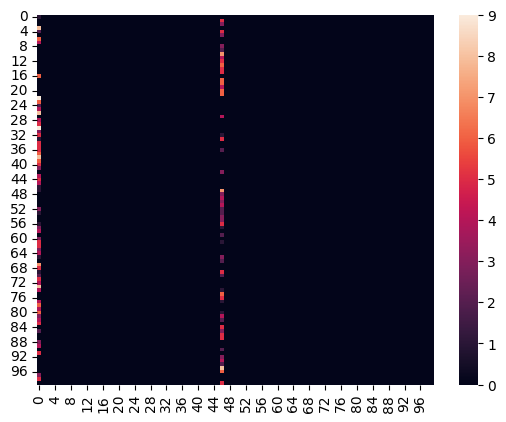

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(f"accuracy: {accuracy_score(y_test, y_pred)} | f1: {f1_score(y_test, y_pred, average='macro')}")
sns.heatmap(confusion_matrix(y_test, y_pred))

accuracy: 0.6770833333333334 | f1: 0.6657892580415801


<Axes: >

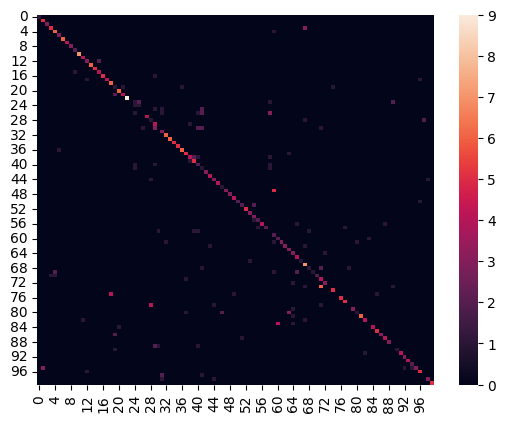

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(f"accuracy: {accuracy_score(y_test, y_pred)} | f1: {f1_score(y_test, y_pred, average='macro')}")
sns.heatmap(confusion_matrix(y_test, y_pred))

С применением метода TSNE классификатор SVM(kernel=linear) показал самый хороший результат. Показатели метрик стали значительно ближе к 1. Причем с методом PCA результат стал хуже.

## K_means

**Task 6. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [ ]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin

def plot_clust(X, centers, lables, ax):
    ax.scatter(X[:,0], X[:,1], c=lables)
    ax.scatter(centers[:,0], centers[:,1], marker='>', color='red')


class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None
        self.centers = None
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        # https://github.com/esokolov/ml-minor-hse/blob/master/lectures/lecture13-clustering.pdf 21 слайд
        centers = np.zeros_like(self.centers)
        for iter in range(self.n_clusters):
            centers[iter] = np.mean(X[self.labels == iter], axis=0)
        return centers

    def update_labels(self, X):
        return pairwise_distances_argmin(X, self.centers)

    def fit(self, X):
        # https://stackoverflow.com/questions/14262654/numpy-get-random-set-of-rows-from-2d-array
        self.centers = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        self.labels = np.zeros(X.shape[0])

        for it in range(self.n_iters):
            new_labels = self.update_labels(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converge by tolerance centers')

                fig, ax = plt.subplots(1,1)
                plot_clust(X, new_centers, new_labels, ax)
                return 0

            self.centers = new_centers

            fig, ax = plt.subplots(1,1)
            plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3);
            clear_output(wait=True);
        fig, ax = plt.subplots(1,1)
        plot_clust(X, new_centers, new_labels, ax)
        plt.pause(0.3)
        return 1

    def plot_cluster(X, centers, lables, ax):
        fig, ax = plt.subplots(1,1)
        plot_clust(X, centers, lables, ax)
        return (fig, ax)

    def predict(self, X):
        labels = self.update_labels(X)
        return labels

Generating data for clustering

In [ ]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 0.5, 0.5],
                             random_state=0)

In [ ]:
X, y = noisy_blobs

**Task 7. <a id="task6"></a> (1.5 points)**

7.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=3`. Plot result. Specify the result label for the object with index 0.

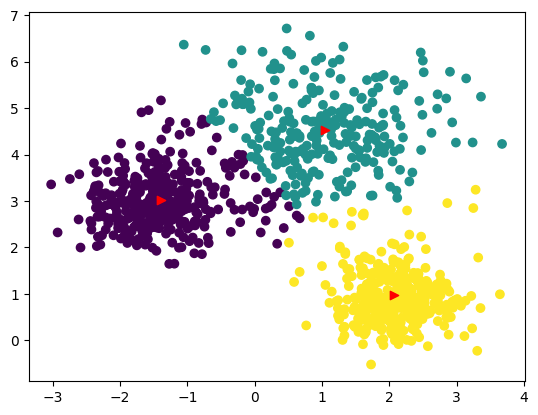

result label for the object with index 0 = 0


In [ ]:
algo = MyKMeans(n_clusters=3, n_iters=3)
plot = algo.fit(X)
pred_small_it = algo.predict(X)
print(f"result label for the object with index 0 = {pred_small_it[0]}")

7.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 100`. Plot result. Specify the result label for the object with index 0.

Converge by tolerance centers
result label for the object with index 0 = 0


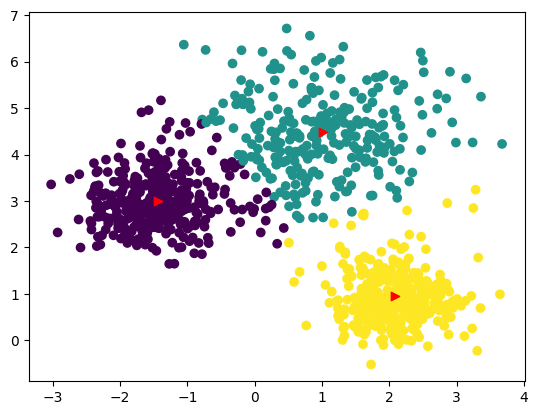

In [ ]:
algo = MyKMeans(n_clusters=3, n_iters=100)
algo.fit(X)
pred_large_it = algo.predict(X)
print(f"result label for the object with index 0 = {pred_large_it[0]}")

7.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 3 to 100

In [ ]:
## your code here
# https://stackoverflow.com/a/25490688
num_of_changed = (pred_small_it != pred_large_it).sum()
num_of_changed

4

**Task 8. <a id="task6"></a> (1.5 points)**

Using the elbow method, select the optimal number of clusters, show it on the plot. As a metric, use the sum of the squares of the distances between the data points and the centroids of the clusters assigned to them divided by number of clusters. To do this, iterate the parameter k from 2 to 50 in steps of 2.

Converge by tolerance centers


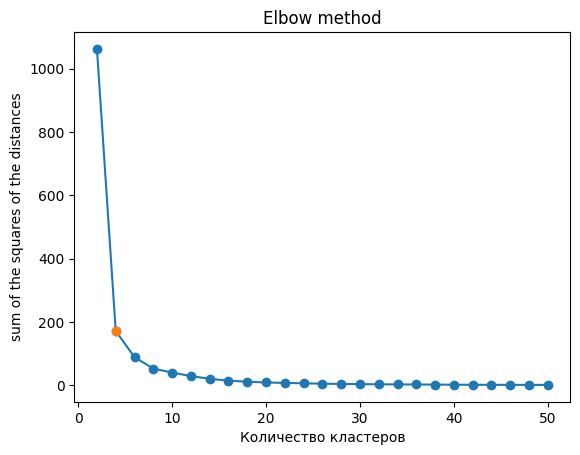

In [ ]:
metric = []
clusters_count = range(2, 51, 2)

for n_clusters in clusters_count:
    k_means = MyKMeans(n_clusters=n_clusters)
    k_means.fit(X)
    centers = k_means.centers
    labels = k_means.labels
    total_sum = 0
    for idx, vec in enumerate(X):
      distance = np.linalg.norm(centers[labels[idx]] - vec)**2
      total_sum += distance
    total_sum /= n_clusters
    metric.append(total_sum)

plt.clf()
plt.plot(clusters_count, metric, marker='o')
plt.plot(clusters_count[1], metric[1], marker='o')
plt.title('Elbow method')
plt.xlabel('Количество кластеров')
plt.ylabel('sum of the squares of the distances')
plt.show()

Методом локтя выбрал точку, где наблюдается переход от резкого уменьшения суммы к более плавному.

## DBSCAN

**Task 9. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.3` hyperparameter. Plot result. Specify the response for the object with index 2.

Cluster for object with index = 2 is 0


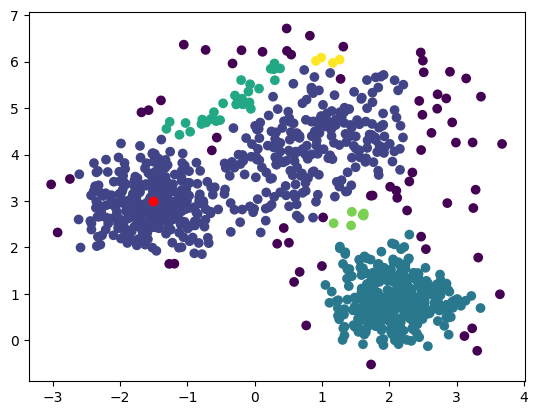

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3)
clusters = dbscan.fit_predict(X)

print("Cluster for object with index = 2 is " + str(clusters[2]))
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.plot(X[2][0], X[2][1], marker='o', color='red')
plt.show()

**Task 10. <a id="task8"></a> (1 point)**

Try different settings of ```eps``` distances (from 0.1 to 0.5) and several values of your choice of ```min_samples```. For each setting plot results. Also output the number of clusters and outliers (objects marked as -1).

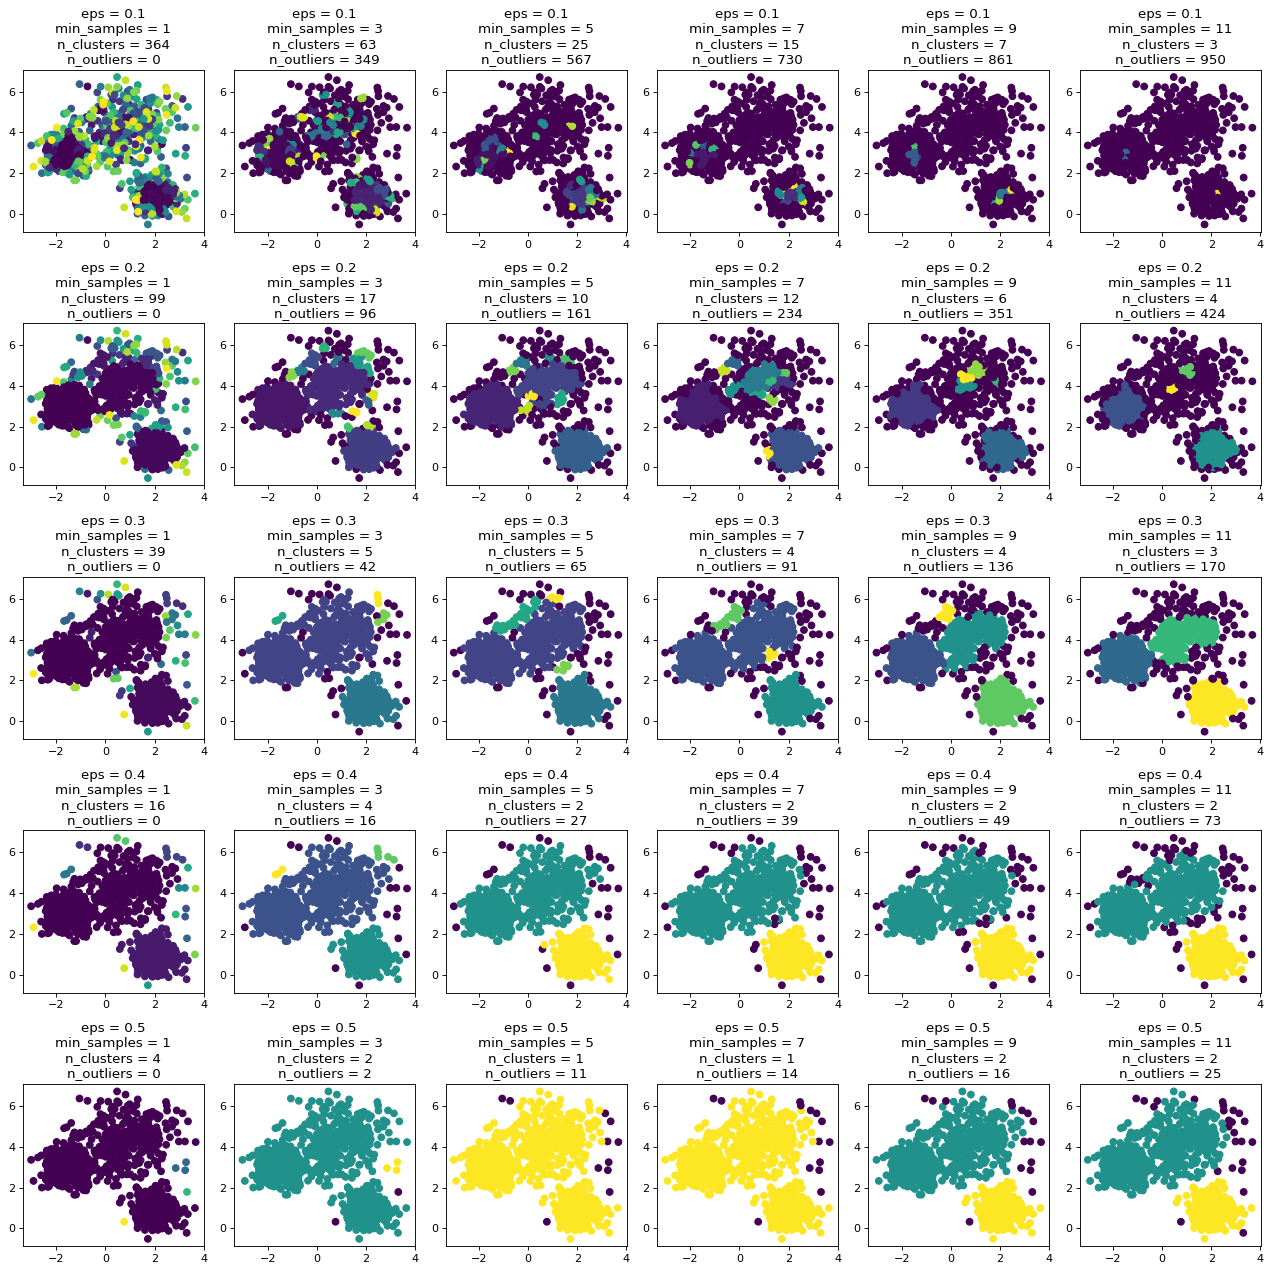

In [ ]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [1, 3, 5, 7, 9, 11]

fig, axes = plt.subplots(nrows=len(eps_values), ncols=len(min_samples_values), figsize=(16, 16), dpi=80)

for idx1, eps in enumerate(eps_values):
  for idx2, min_samples in enumerate(min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)
    n_clisters = np.unique(clusters[clusters >= 0]).size
    n_outliers = clusters[clusters < 0].size
    axes[idx1, idx2].scatter(X[:, 0], X[:, 1], c=clusters)
    axes[idx1, idx2].set_title(f"eps = {eps}\nmin_samples = {min_samples}\nn_clusters = {n_clisters}\nn_outliers = {n_outliers}")
fig.tight_layout()
fig.show()